In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('test.jpg')
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27: # wait for ESC key to exit
    cv2.destroyAllWindows()

In [3]:
drawing = False # true if mouse is pressed
mode = 0 # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
cx,cy = -1,-1
font = cv2.FONT_HERSHEY_SIMPLEX

In [4]:
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,cx,cy,drawing,mode
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
        cx,cy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cx,cy = x,y
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cx,cy = x,y
def nothing(x):
    pass        

In [5]:
#img = np.zeros((512,512,3), np.uint8)
img = cv2.imread('test.jpg')
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
cv2.createTrackbar('value','image',0,255,nothing)
while(1):
    img = cv2.imread('test.jpg')
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode+=1
        if mode > 3:
            mode=0
    elif k == 27:
        break
    # get current positions of four trackbars
    value = cv2.getTrackbarPos('value','image')    
    if ix != -1 and iy != -1:
        cv2.rectangle(img,(ix,iy),(cx,cy),(0,255,0),0) 
        if mode == 1:
            clip = img[iy:cy,ix:cx]
            clip[:,:,1]=0 #green
            clip[:,:,2]=0 #red
        elif mode == 2:
            clip = img[iy:cy,ix:cx]
            clip[:,:,0]=0 #blue
            clip[:,:,2]=0 #red
        elif mode == 3:
            clip = img[iy:cy,ix:cx]
            clip[:,:,0]=0 #blue
            clip[:,:,1]=0 #green
    msg = "Mouse position ("+str(ix)+","+str(iy)+") - ("+str(cx)+","+str(cy)+") - "+str(value)+" - "+str(mode)
    cv2.putText(img,msg,(10,30),font,.6,(255,255,255),1,cv2.LINE_AA)
    cv2.imshow('image',img)
cv2.destroyAllWindows()

In [12]:
def imageshow(img):
    cv2.imshow('image',img)
    k = cv2.waitKey(0)
    if k == 27: # wait for ESC key to exit
        cv2.destroyAllWindows()

In [11]:
img = cv2.imread('test.jpg')

In [12]:
clip = img[400:600, 400:500]
img[100:300, 100:200] = clip
clip[:,:,1]=0 #green
clip[:,:,2]=0 #red

In [13]:
imageshow(img)

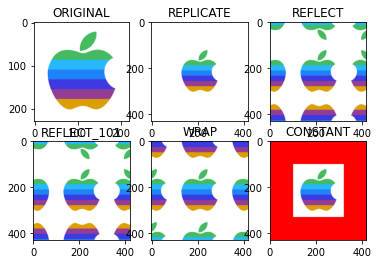

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
BLUE = [255,0,0]
img1 = cv2.imread('test2.png')
m=100

#패딩을 할 수 있다.
replicate = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
#           231 행,렬,순서
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()


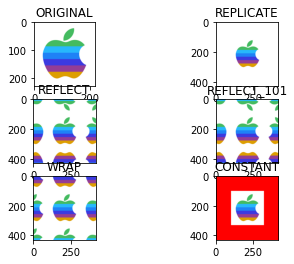

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
BLUE = [255,0,0]
img1 = cv2.imread('test2.png')
m=100

replicate = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_CONSTANT,value=BLUE)
plt.subplot(321),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(322),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(323),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(324),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(325),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(326),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()


In [4]:
#이미지 합성
#크기가 같아야함

import cv2

def nothing(x):
    pass

img1 = cv2.imread('img1.jpg')
img2 = cv2.imread('img2.jpg')
alpha = 0
dst = cv2.addWeighted(img1,0.3,img2,0.7,0)

cv2.namedWindow('image')
cv2.createTrackbar('alpha','image',0,255,nothing)

while(1):
    cv2.imshow('image',dst)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    
    alp = cv2.getTrackbarPos('alpha','image')
    
    dst = cv2.addWeighted(img1,1-alp/255,img2,alp/255,0)

cv2.destroyAllWindows()

In [7]:
# 시간재기
# e1 = cv2.getTickCount()
# e2 = cv2.getTickCount()
# t = (e2-e1)/cv2.getTickFrequency()

85290998310

In [18]:
#median 중앙값, 이미지 주변의 칼라값을 정렬해서 가장중앙 칼라값을 가져옴


import cv2

def nothing(x):
    pass



cv2.namedWindow('image')
cv2.createTrackbar('medianBlur','image', 5,49,nothing)
#                   트랙바이름   윈도우이름  트랙바범위  ?
img1 = cv2.imread('img1.jpg')
i=5

while(1):
    i = cv2.getTrackbarPos('medianBlur','image')   #트랙바에서 값가져옴
    i = int(i/2)*2+1     #홀수만 해야해서 연산 !!
    dst = cv2.medianBlur(img1, i)   #메디안블러 실행 단위 i만큼씩 메디안시킴
    cv2.imshow('image',dst)     #메디안블러 시킨 이미지 출력
    
    k = cv2.waitKey(1) & 0xFF # esc종료
    if k == 27:
        break

cv2.destroyAllWindows()